In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, accuracy_score,f1_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import Pipeline
from nltk.corpus import names
from collections import defaultdict
import re

%matplotlib inline

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
data = pd.Series(newsgroups.data)
df = pd.DataFrame(data)
df.columns = ['text'] + df.columns.tolist()[1:]
df['target'] = pd.Series(newsgroups.target)
df.head()

,text,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4


In [3]:
print('shape of dataframe: ', df.shape)
print('number of target variables: ',df.target.nunique())
print('null target variables: ', df.target.isna().any())
print('null text: ',df.text.isna().any())

shape of dataframe:  (18846, 2)
number of target variables:  20
null target variables:  False
null text:  False


In [4]:
df.text

0        \n\nI am sure some bashers of Pens fans are pr...
1        My brother is in the market for a high-perform...
2        \n\n\n\n\tFinally you said what you dream abou...
3        \nThink!\n\nIt's the SCSI card doing the DMA t...
4        1)    I have an old Jasmine drive which I cann...
                               ...                        
18841    DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
18842    \nNot in isolated ground recepticles (usually ...
18843    I just installed a DX2-66 CPU in a clone mothe...
18844    \nWouldn't this require a hyper-sphere.  In 3-...
18845    After a tip from Gary Crum (crum@fcom.cc.utah....
Name: text, Length: 18846, dtype: object

In [5]:
df1 = df[df.text != ' ']
df1

,text,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


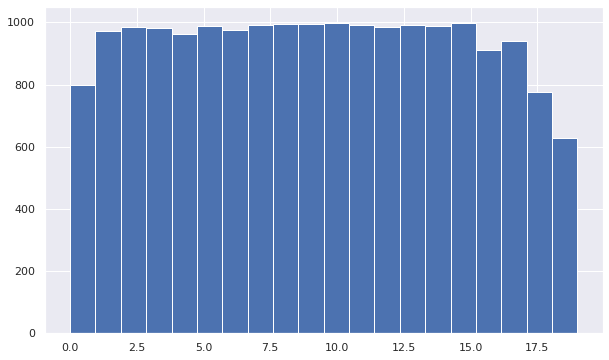

In [6]:
sns.set(rc={'figure.figsize':(10,6)})
df['target'].hist(bins=df.target.nunique())

In [7]:
#remove emails
df['text'] = df['text'].apply(lambda row: re.sub(r"\S*@\S*\s?","",row))

#remove extra spaces
df['text'] = df['text'].apply(lambda row: re.sub(r"\s+"," ",row))

# #remove single quote marks
df['text'] = df['text'].apply(lambda row: re.sub(r"\'","",row))

#make all text lower case
df['text'] = df['text'].str.lower()

#remove empty rows
# df['text'] = df[df.text != ' ']

In [8]:
df.isna().any()

text      False
target    False
dtype: bool

In [9]:
#instatiate tokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

#tokenize test
df['tokenized_text'] = df.apply(lambda row: tokenizer.tokenize(row['text']),axis=1)

#define stop words
stop_words=set(stopwords.words("english"))

#remove stop words
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [item for item in x if item not in stop_words])

#instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

#lemmatize text
df['lemmatized'] = df['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
df.lemmatized = df.lemmatized.apply(lambda x: " ".join(x) )

df.sample(5)

,text,target,tokenized_text,lemmatized
16540,article #61153 (61302 is last): from: (nicki a...,3,"[article, 61153, 61302, last, nicki, stassen, ...",article 61153 61302 last nicki stassen lantz s...
16183,"wrong. quite true. and evolution made ""decide...",18,"[wrong, quite, true, evolution, made, decided,...",wrong quite true evolution made decided homose...
2888,"lord, i hope you dont hoover was a pro! he was...",16,"[lord, hope, dont, hoover, pro, monstrous]",lord hope dont hoover pro monstrous
3985,detroit is a very disciplined team. theres a l...,10,"[detroit, disciplined, team, theres, lot, euro...",detroit disciplined team there lot european de...
10467,this past week ive been playing with some of t...,1,"[past, week, ive, playing, r, reaction, diffus...",past week ive playing r reaction diffusion con...


In [10]:
df.tokenized_text.isna().any()

False

In [11]:
#train test validation split

X,y = df.lemmatized,df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [12]:
accuracy = make_scorer(accuracy_score, average='macro')
precision = make_scorer(precision_score, average='macro')
recall =  make_scorer(recall_score, average='macro')
f1 = make_scorer(f1_score, average='macro')
scoring={'accuracy':accuracy,'precision':precision,'recall':recall,'f1':f1}

In [13]:
#pipeline for logistic regression

pipe_logreg = Pipeline([
#     ('vect', CountVectorizer()),
     ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])
parameters_logreg = {
    'tfidf__min_df': [0.001,0.005,0.01],
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__max_features': [None, 5000, 10000, 50000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    "clf__C": [0.01, 0.1, 1,10],
    "clf__class_weight": ['balanced'],
    "clf__solver": ['newton-cg', 'lbfgs', 'sag'],
#     "clf__l1_ratio":[0,0.2,0.4,0.6,0.8,1],
    "clf__multi_class":['multinomial']
}

gs_logreg = GridSearchCV(estimator=pipe_logreg,
            param_grid=parameters_logreg,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)




In [14]:
# Fit using grid search
best_model = gs_logreg.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_logreg.best_score_)

# Best params
print('\nBest params:\n', gs_logreg.best_params_)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 60.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 84.2min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 91.3min finished


Best accuracy: 0.708

Best params:
 {'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__multi_class': 'multinomial', 'clf__solver': 'newton-cg', 'tfidf__max_df': 0.5, 'tfidf__max_features': None, 'tfidf__min_df': 0.001, 'tfidf__ngram_range': (1, 1)}


In [15]:
pipe_logreg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf', 'clf', 'tfidf__analyzer', 'tfidf__binary', 'tfidf__decode_error', 'tfidf__dtype', 'tfidf__encoding', 'tfidf__input', 'tfidf__lowercase', 'tfidf__max_df', 'tfidf__max_features', 'tfidf__min_df', 'tfidf__ngram_range', 'tfidf__norm', 'tfidf__preprocessor', 'tfidf__smooth_idf', 'tfidf__stop_words', 'tfidf__strip_accents', 'tfidf__sublinear_tf', 'tfidf__token_pattern', 'tfidf__tokenizer', 'tfidf__use_idf', 'tfidf__vocabulary', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__l1_ratio', 'clf__max_iter', 'clf__multi_class', 'clf__n_jobs', 'clf__penalty', 'clf__random_state', 'clf__solver', 'clf__tol', 'clf__verbose', 'clf__warm_start'])

In [16]:
type(df.lemmatized[0])

str

In [17]:
#pipeline for decision tree

pipe_tree = Pipeline([
     ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
])
parameters_tree = {
    'tfidf__min_df': [0.001,0.005,0.01],
#     'tfidf__max_df': [0.5, 0.75, 1.0],
#     'tfidf__max_features': [None, 5000, 10000, 50000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    "clf__criterion": ["gini", "entropy"],
    "clf__splitter": ['best','random'],
    "clf__max_features": [None, 5000, 10000, 50000],
    "clf__max_depth":[10,20,40,50],
    "clf__min_samples_split" : [25,50,75,100]
}

gs_tree = GridSearchCV(estimator=pipe_tree,
            param_grid=parameters_tree,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search
best_model = gs_tree.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_tree.best_score_)

# Best params
print('\nBest params:\n', gs_tree.best_params_)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]:

Best accuracy: 0.400

Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 50, 'clf__max_features': None, 'clf__min_samples_split': 100, 'clf__splitter': 'best', 'tfidf__min_df': 0.001, 'tfidf__ngram_range': (1, 2)}


In [18]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf', 'clf', 'tfidf__analyzer', 'tfidf__binary', 'tfidf__decode_error', 'tfidf__dtype', 'tfidf__encoding', 'tfidf__input', 'tfidf__lowercase', 'tfidf__max_df', 'tfidf__max_features', 'tfidf__min_df', 'tfidf__ngram_range', 'tfidf__norm', 'tfidf__preprocessor', 'tfidf__smooth_idf', 'tfidf__stop_words', 'tfidf__strip_accents', 'tfidf__sublinear_tf', 'tfidf__token_pattern', 'tfidf__tokenizer', 'tfidf__use_idf', 'tfidf__vocabulary', 'clf__ccp_alpha', 'clf__class_weight', 'clf__criterion', 'clf__max_depth', 'clf__max_features', 'clf__max_leaf_nodes', 'clf__min_impurity_decrease', 'clf__min_impurity_split', 'clf__min_samples_leaf', 'clf__min_samples_split', 'clf__min_weight_fraction_leaf', 'clf__presort', 'clf__random_state', 'clf__splitter'])

In [ ]:
#pipeline for random forest

pipe_rf = Pipeline([
     ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])
parameters_rf = {
    'tfidf__min_df': [0.001,0.005,0.01],
#     'tfidf__max_df': [0.5, 0.75, 1.0],
#     'tfidf__max_features': [None, 5000, 10000, 50000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    "clf__criterion": ["gini", "entropy"],
    "clf__max_features": [None, 5000, 10000, 50000],
    "clf__max_depth":[10,20,40,50],
    "clf__min_samples_split" : [25,50,75,100]
}

rf_tree = GridSearchCV(estimator=pipe_rf,
            param_grid=parameters_rf,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search
best_model = rf_tree.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % rf_tree.best_score_)

# Best params
print('\nBest params:\n', rf_tree.best_params_)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 62.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 122.3min


In [1]:
!pip install xgboost


     |████████████████████████████████| 109.7 MB 9.3 kB/s  eta 0:00:01  |█▊                              | 5.8 MB 4.9 MB/s eta 0:00:22     |██                              | 7.0 MB 4.9 MB/s eta 0:00:22     |███▍                            | 11.7 MB 4.9 MB/s eta 0:00:21     |███▉                            | 13.0 MB 4.9 MB/s eta 0:00:20     |████▏                           | 14.3 MB 4.9 MB/s eta 0:00:20     |████▊                           | 16.2 MB 4.9 MB/s eta 0:00:20     |██████                          | 20.7 MB 4.9 MB/s eta 0:00:19     |█████████                       | 31.1 MB 42.1 MB/s eta 0:00:02     |███████████████▊                | 54.1 MB 42.1 MB/s eta 0:00:02     |█████████████████▌              | 59.9 MB 25.9 MB/s eta 0:00:02     |█████████████████▉              | 61.2 MB 25.9 MB/s eta 0:00:02     |████████████████████            | 68.4 MB 25.9 MB/s eta 0:00:02     |████████████████████▋           | 70.9 MB 25.9 MB/s eta 0:00:02     |█████████████████████           | 72.0 